### EXER 2

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### 5. Write down the meta information about the “cancer.csv” data set available in the UCI repository, https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

#### Title: Wisconsin Diagnostic Breast Cancer (WDBC)

Number of instances: 569

Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

#### Attribute information:
ID number

Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry 

j) fractal dimension ("coastline approximation" - 1)
    
Missing attribute values: none

#### Class distribution: 357 benign, 212 malignant

In [3]:
# importing the wine dataset
df = pd.read_csv("cancer.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# printing quick summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

We can observe that the last column 'Unnamed: 32' is containing all null values, hence we can drop that column.

In [5]:
df.drop(columns = ['Unnamed: 32'],axis = 1,inplace=True)
df.shape

(569, 32)

### 6. Tabulate and visualize the distribution of the numeric variables.

In [6]:
# to obtain descriptive statistics for numerical variables
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

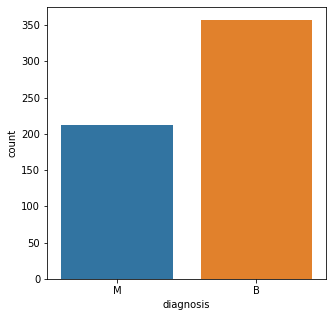

In [7]:
#Let's see the frequency of the variable target.

plt.figure(figsize=(5,5))
sns.countplot(df.diagnosis)

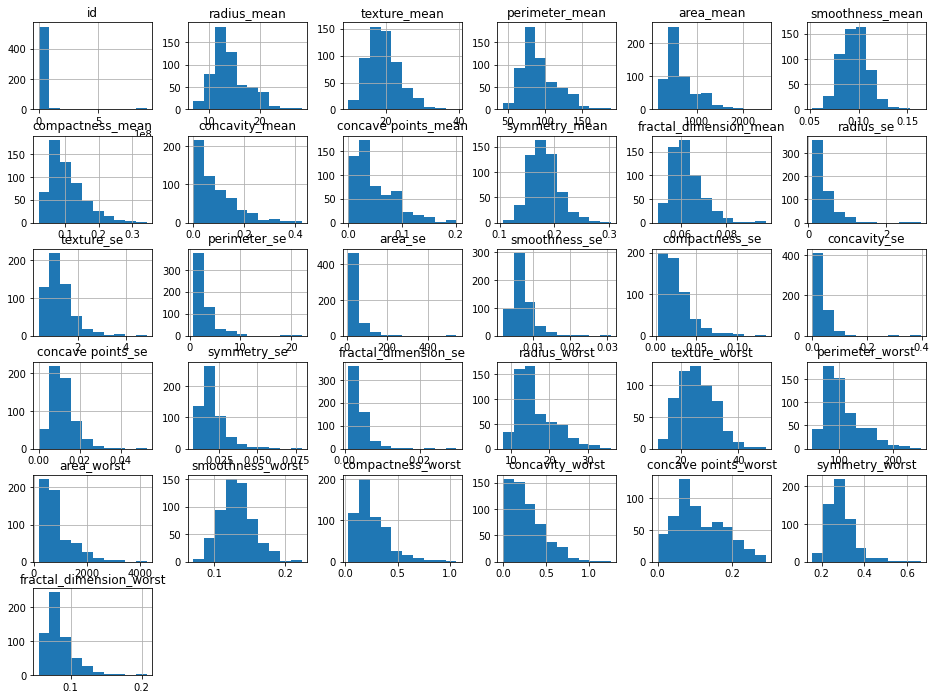

In [8]:
df.hist(bins=10, figsize=(16,12))
plt.show()

There are no missing values in any of the variables. From the basic statistical values we can see that none of the variables follows a normal distribution, since none has mean 0 and standard deviation 1

### 7. Perform the required preprocessing , 70,30 split and build a classifier using the SVM model available in SciKit Learn.

In [9]:
#Splitting the predictor & response variables
X = df.drop(columns = ['diagnosis'],axis =1)
y = df.diagnosis

In [10]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [11]:
# Spliting of the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state = 42)

In [12]:
#Import svm model
from sklearn.svm import SVC

#Create a svm Classifier
clf = SVC()

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [13]:
# Evaluating the model
accuracy_score(y_test,y_pred)

0.9766081871345029

<AxesSubplot:>

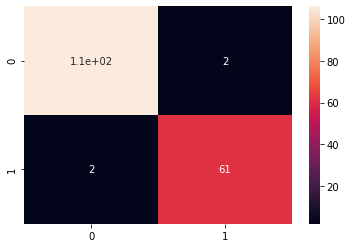

In [14]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

### 8. Tune the hyperparameters of kernel (linear, polynomial, and radial basis), regularization and gamma. Tabulate the model performance and comment on the best model found for the given dataset

A grid search allows us to exhaustively test all possible hyperparameter configurations that we are interested in tuning.

#### The hyperparameters to an SVM include:

Kernel choice: linear, polynomial, radial basis function

Strictness (C): Typical values are in the range of 0.0001 to 1000

Kernel-specific parameters: degree (for polynomial) and gamma (RBF)

In [15]:
# importing gridsearch module from sklearn to find model with best performance
from sklearn.model_selection import GridSearchCV

In [21]:
param_grid= {'kernel':['rbf','linear','polynomial'],
            'gamma':[10,1,0.1,0.01,0.001,0.0001],
            'C': [0.1, 1, 10, 100, 1000]}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
y_pred1 = grid.predict(X_test)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=10, kernel=linear;, score=0.975 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=10, kernel=linear;, score=0.975 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=10, kernel=linear;, score=0.988 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=10, kernel=linear;, score=0.975 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=10, kernel=linear;, score=0.962 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=10, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=10, kernel=polynomi

[CV 3/5] END .....C=1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END .....C=1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 5/5] END .....C=1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.975 total time=   0.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.925 total time=   0.0s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.938 total time=   0.0s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.962 total time=   0.0s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.949 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.975 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.975 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.975 total time=   0.0s
[CV 5/5] END .....C=1, gamma

[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.924 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.937 total time=   0.0s
[CV 1/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.963 total time=   0.0s
[CV 2/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.938 total time=   0.0s
[CV 3/5] END .C=10, gamma=0.0001, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.962 total time=   0.0s
[CV 5/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.937 total time=   0.0s
[CV 1/5] END C=10, gamma=0.0001, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END C=10, gamma=0.0001, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END C=10, gamma=0.0001, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END C=10, gamma=0.0001, kernel=polynomial;, score=nan total time=   0.0s
[CV 5/5] END C=10, gamma=0.0001, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/5] END .......C=1

[CV 2/5] END ......C=1000, gamma=10, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ......C=1000, gamma=10, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ......C=1000, gamma=10, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ......C=1000, gamma=10, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=10, kernel=linear;, score=0.963 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=10, kernel=linear;, score=0.900 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=10, kernel=linear;, score=0.988 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=10, kernel=linear;, score=0.962 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=10, kernel=linear;, score=0.937 total time=   0.0s
[CV 1/5] END .C=1000, gamma=10, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END .C=1000, gamma=10, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END .C=1000, gamma=10, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END .C=1000, gamma=

In [22]:
# checking the accuracy
accuracy_score(y_pred1,y_test)

0.9824561403508771

In [19]:
# printing the best set of hyperparameters
print(grid.best_params_)

{'C': 0.1, 'gamma': 10, 'kernel': 'linear'}


In [20]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           B       0.98      0.99      0.99       108
           M       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

